In [8]:

import rasterio
import matplotlib.pyplot as plt
import os
from matplotlib.colors import ListedColormap
import re
import csv
from skimage import io
import requests
from PIL import Image
from io import BytesIO

['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T11SKU.2022133T183402.v2.0/HLS.L30.T11SKU.2022133T183402.v2.0.jpg', 's3://lp-prod-public/HLSL30.020/HLS.L30.T11SKU.2022133T183402.v2.0/HLS.L30.T11SKU.2022133T183402.v2.0.jpg']


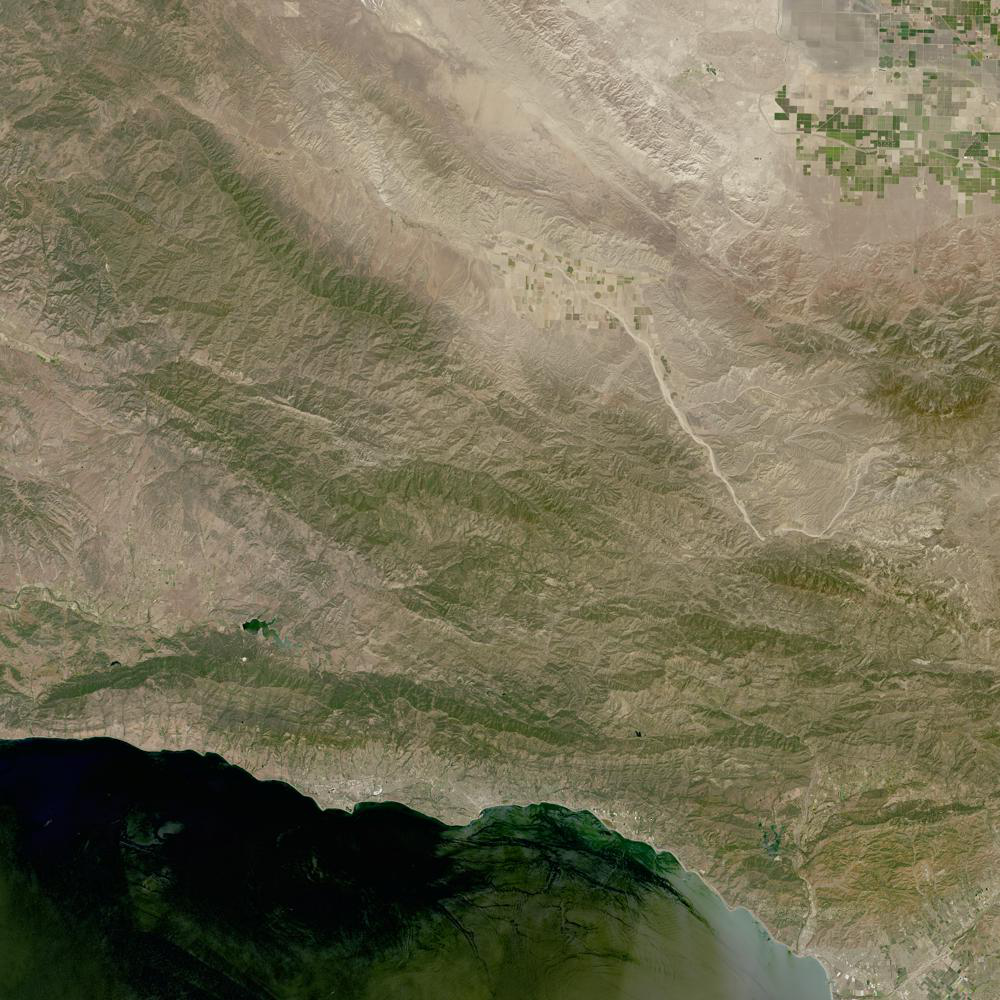

In [20]:
tile = '11SKU'
location = 'Isla_Vista_Kelp'
path = os.path.join(r'/mnt/c/Users/attic/HLS_Kelp/imagery',location,tile)
granule ='HLS.L30.T11SKU.2022133T183402.v2.0'
files = os.listdir(os.path.join(path,granule))
metadata_file = [f for f in files if re.search(r'metadata\.csv$', f)]
if metadata_file :
    with open(os.path.join(path,granule, metadata_file[0]), mode='r') as file:
        csv_reader = csv.reader(file)
        keys = next(csv_reader)  
        values = next(csv_reader) 
    metadata = dict(zip(keys, values))
urls = metadata['data_vis_url']
img_urls = urls.strip("[]").replace("'", "").split(", ")
print(img_urls)
response = requests.get(img_urls[0])
img = Image.open(BytesIO(response.content))
img.show()


HLS.L30.T11SKU.2017135T183333.v2.0_kelp_classified.tif


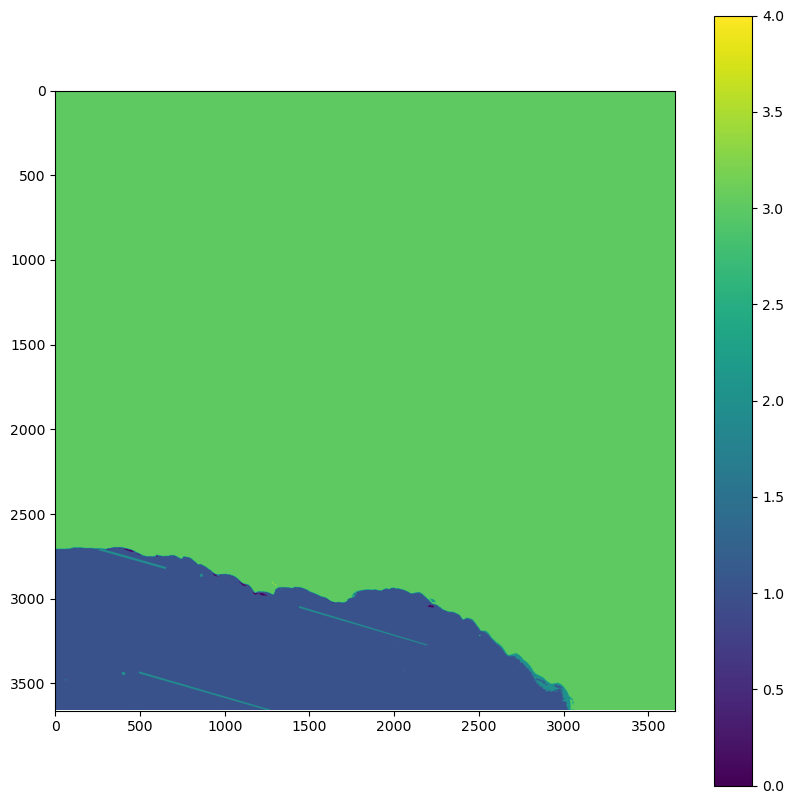

In [19]:
path = r'/mnt/c/Users/attic/HLS_Kelp/imagery/rf_training_v3_cleaned'
files = os.listdir(path)
training_data = []
cmap = ListedColormap(['red', 'blue', 'green'])
for i, file in enumerate(files):
    with rasterio.open('/mnt/c/Users/attic/HLS_Kelp/imagery/rf_training_V2/HLS.S30.T11SKU.2017287T185431.v2.0_kelp_classified.tif') as src:#path, file)) as src:
        training_img = src.read(7)  
        print(file)
        plt.figure(figsize=(10, 10))
        plt.imshow(training_img)#[2800:3200,800:1600])
        plt.colorbar()
        plt.show()  
    break
# plt.figure(figsize=(6, 6))
# plt.imshow(training_img[6,:], cmap='gray')
# plt.show()  